1. Carregue o dataset breast cancer disponível no sklearn e obtenha a distribuição de classes deste dataset.


In [28]:
from sklearn import datasets
import numpy as np

breast_cancer = datasets.load_breast_cancer()

cancer_X = breast_cancer.data
cancer_y = breast_cancer.target

def classDistribution(classes):

    dataset_size = len(classes)
    labels = np.unique(classes)
    
    classDistr = []
    for label_name in labels:   
        cvc = np.sum(classes == label_name)
        classDistr += [(label_name, cvc/dataset_size)]

    return classDistr

print(classDistribution(cancer_y))

[(0, 0.37258347978910367), (1, 0.6274165202108963)]


2. Compare as métricas accuracy e f1 em bases de dados binárias indicando as suas vantagens em relação a outra. Use o classificador Vizinho Mais Próximo e uma divisão percentual com 30% dos exemplos do dataset breast cancer usados parateste para obter o valor da acurácia e f1 deste classificador neste dataset.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

percentage = 0.3

split_index_X = int(len(cancer_X) * percentage)
split_index_y = int(len(cancer_y) * percentage)

X_train, X_test = cancer_X[:split_index_X], cancer_X[split_index_X:]
y_train, y_test = cancer_y[:split_index_y], cancer_y[split_index_y:]

kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_train, y_train) 

y_pred = kNN.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       137
           1       0.89      0.94      0.91       262

    accuracy                           0.88       399
   macro avg       0.88      0.86      0.87       399
weighted avg       0.88      0.88      0.88       399



3. Use o classificador Vizinho Mais Próximo e uma validação cruzada estratificada com 10 folds no dataset breast cancer para obter a matriz de confusão, a acurácia,o desvio padrão, o intervalo de confiança a 95%, a f1 macro, a precision micro e o recall micro deste classificador neste dataset.


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       200
           1       0.95      0.92      0.93       369

    accuracy                           0.92       569
   macro avg       0.90      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569

Média: 0.95
Desvio: 0.03
Intervalo de confiança 95%: (0.90,0.93)


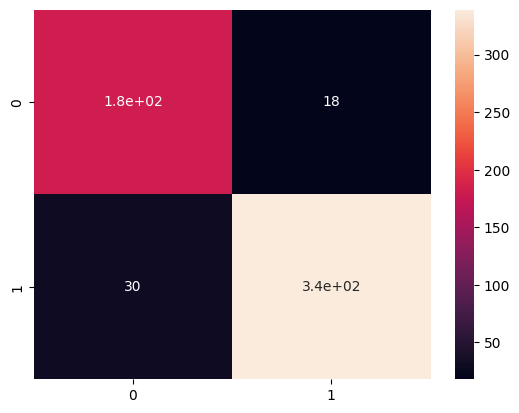

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=42, stratify=cancer_y)

kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_train, y_train) 

y_pred = cross_val_predict(kNN, cancer_X, cancer_y, cv=10)

scores = cross_val_score(kNN, cancer_X, cancer_y, cv=10)

print(classification_report(y_pred, cancer_y))
scores_max = scores.max()
scores_std = scores.std()
print(f"Média: {scores_max:.2f}")
print(f"Desvio: {scores_std:.2f}")
inf, sup = stats.norm.interval(0.95, loc=scores.mean(), 
                               scale=scores_std/np.sqrt(len(scores)))
print(f"Intervalo de confiança 95%: ({inf:.2f},{sup:.2f})")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pred, cancer_y)

sns.heatmap(cm, annot=True)
plt.show()

4. Use o classificador K Vizinhos Mais Próximos com o método indicado (use 10 partições) no dataset breast cancer para realizar a busca pelo melhor valor de K. Apresente a melhor acurácia obtida, o desvio padrão, o intervalo de confiança a 95% e o valor de K correspondente.


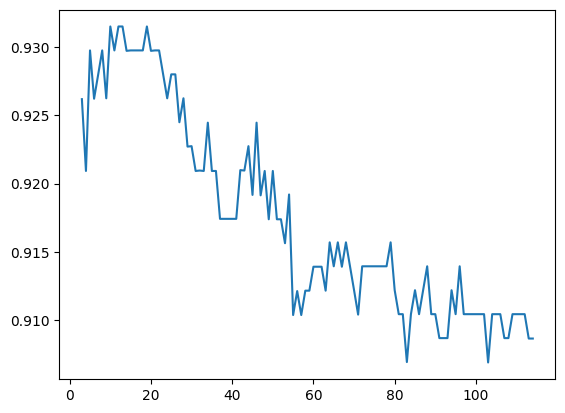

Best K: 10


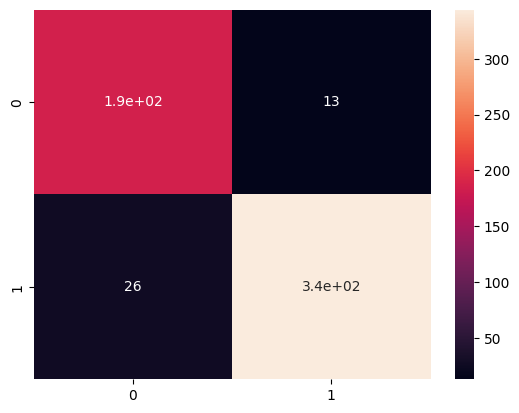

Média: 0.96
Desvio: 0.03
Intervalo de confiança 95%: (0.91,0.95)


In [31]:
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=42, stratify=cancer_y)

def test_k(k: int) -> np.ndarray:
    kNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    kNN.fit(X_train, y_train) 
    # Returns only accuracy
    return cross_val_score(kNN, cancer_X, cancer_y, cv=10, n_jobs=-1)

starting_K = sqrt(len(cancer_X))
k_scores = [test_k(k) for k in range(3, int(starting_K) * 5)]
# Plotting results for K
sns.lineplot(x=range(3, int(starting_K) * 5), y=[np.mean(scores) for scores in k_scores])
plt.show()

best_k = np.argmax([np.mean(scores) for scores in k_scores]) + 3
print(f"Best K: {best_k}")

kNN = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
kNN.fit(X_train, y_train) 

y_pred = cross_val_predict(kNN, cancer_X, cancer_y, cv=10)

scores = cross_val_score(kNN, cancer_X, cancer_y, cv=10)

cm = confusion_matrix(y_pred, cancer_y)

sns.heatmap(cm, annot=True)
plt.show()

scores_max = scores.max()
scores_std = scores.std()
print(f"Média: {scores_max:.2f}")
print(f"Desvio: {scores_std:.2f}")
inf, sup = stats.norm.interval(0.95, loc=scores.mean(), 
                               scale=scores_std/np.sqrt(len(scores)))
print(f"Intervalo de confiança 95%: ({inf:.2f},{sup:.2f})")

5. Use o classificador K Vizinhos Mais Próximos com o método indicado no dataset breast cancer para realizar a busca pelo melhor valor de K sem possibilidade de superajuste. Apresente a melhor acurácia obtida, o desvio padrão e o intervalo de confiança a 95%.


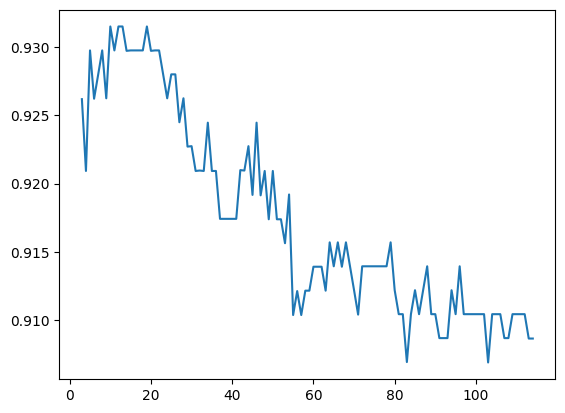

Best K: 10
Média: 0.96
Desvio: 0.03
Intervalo de confiança 95%: (0.91,0.95)


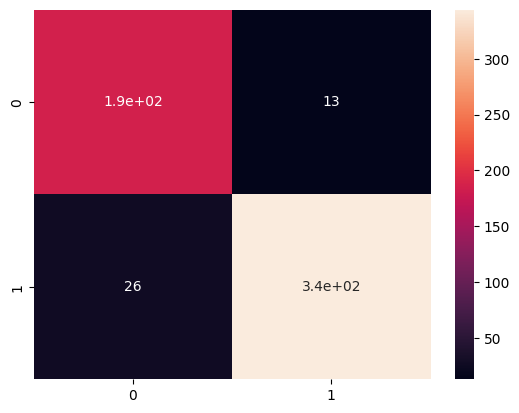

In [32]:
# To do this, we need to split the data every time we are testing a new K

def test_k(k: int) -> np.ndarray:
    X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=None, stratify=cancer_y)
    kNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    kNN.fit(X_train, y_train) 
    # Returns only accuracy
    return cross_val_score(kNN, cancer_X, cancer_y, cv=10, n_jobs=-1)

starting_K = sqrt(len(cancer_X))
k_scores = [test_k(k) for k in range(3, int(starting_K) * 5)]
# Plotting results for K
sns.lineplot(x=range(3, int(starting_K) * 5), y=[np.mean(scores) for scores in k_scores])
plt.show()

best_k = np.argmax([np.mean(scores) for scores in k_scores]) + 3
print(f"Best K: {best_k}")

kNN = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
kNN.fit(X_train, y_train) 

y_pred = cross_val_predict(kNN, cancer_X, cancer_y, cv=10)

scores = cross_val_score(kNN, cancer_X, cancer_y, cv=10)

scores_max = scores.max()
scores_std = scores.std()
print(f"Média: {scores_max:.2f}")
print(f"Desvio: {scores_std:.2f}")
inf, sup = stats.norm.interval(0.95, loc=scores.mean(), 
                               scale=scores_std/np.sqrt(len(scores)))
print(f"Intervalo de confiança 95%: ({inf:.2f},{sup:.2f})")

cm = confusion_matrix(y_pred, cancer_y)

sns.heatmap(cm, annot=True)
plt.show()

6. Repita o procedimento proposto no exercício 9 somente trocando o classificador para uma Árvore de Decisão. Compare o desempenho obtido pelo K Vizinhos Mais Próximos com a Árvore de Decisão utilizando o teste T e o de Wilcoxon. Compare os dois resultados e indique em qual dos testes é mais fácil mostrar a diferença entre os métodos.